<a href="https://colab.research.google.com/github/luqman977hakim-dotcom/python-data-analysis/blob/main/AIrBnb_Listing_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AirBnb Listings

1. Cast any date columns as a datetime format
2. Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’
3. QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [1]:
import pandas as pd

listings = pd.read_csv(
    "Listings.csv",
    encoding="ISO-8859-1",
    low_memory=False
    )
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [5]:
listings["host_since"] = pd.to_datetime(listings["host_since"])

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [6]:
paris_listings = (
    listings.query("city == 'Paris'")
    .loc [:,["host_since", "neighbourhood", "city", "accommodates", "price"]]
)
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [7]:
paris_listings.isna().sum()

,0
host_since,33
neighbourhood,0
city,0
accommodates,0
price,0


In [8]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [9]:
paris_listings.query("accommodates == 0").count()

,0
host_since,54
neighbourhood,54
city,54
accommodates,54
price,54


4. Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)
5. Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)
6. Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [15]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price" : "mean"})
    .sort_values("price")

    )
paris_listings_neighbourhood.head ()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [21]:
paris_listings_accomodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price" : "mean",})
    .sort_values("price")
)
paris_listings_accomodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [24]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("YE")
    .agg({
        "neighbourhood": "count",
        "price": "mean"
        })
    )
paris_listings_over_time.head()


,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


7. Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed
8. Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed.
9. Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed
10. Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?

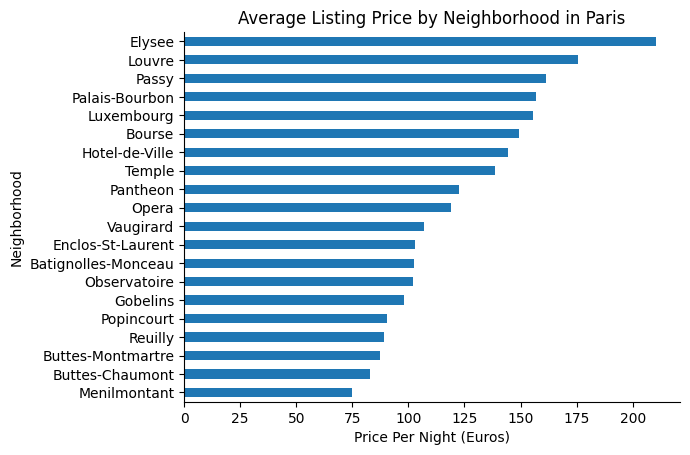

In [32]:
import seaborn as sns
(paris_listings_neighbourhood
 .plot
 .barh(
     title = "Average Listing Price by Neighborhood in Paris",
     xlabel = "Price Per Night (Euros)",
     ylabel = "Neighborhood",
     legend = None
 )
)

sns.despine()

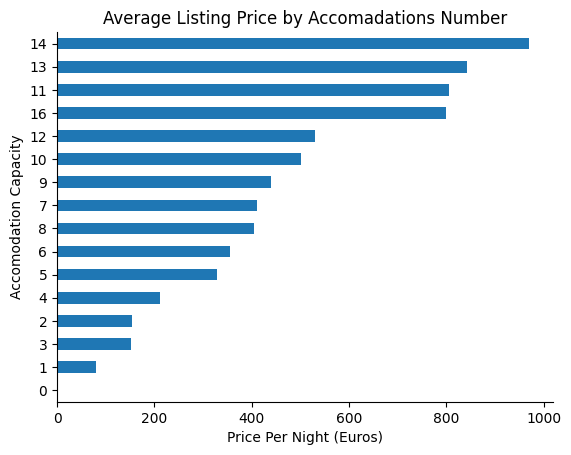

In [35]:
(paris_listings_accomodates
 .plot
 .barh(
     title = "Average Listing Price by Accomadations Number",
     xlabel = "Price Per Night (Euros)",
     ylabel = "Accomodation Capacity",
     legend = None
 )
)

sns.despine()

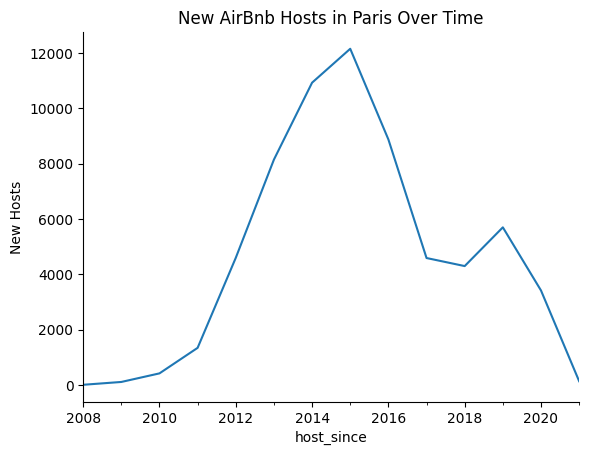

In [39]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel = "New Hosts",
    title = "New AirBnb Hosts in Paris Over Time"
)

sns.despine()

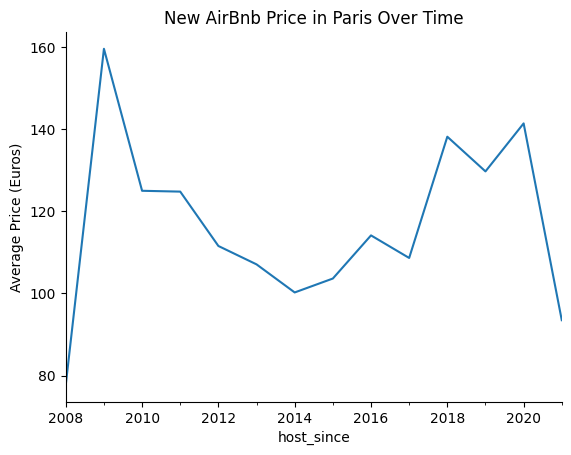

In [40]:
paris_listings_over_time["price"].plot(
    ylabel = "Average Price (Euros)",
    title = "New AirBnb Price in Paris Over Time"
)

sns.despine()

Text(0.5, 1.0, '2015 regulations lead to fewer new hosts,Higher Price')

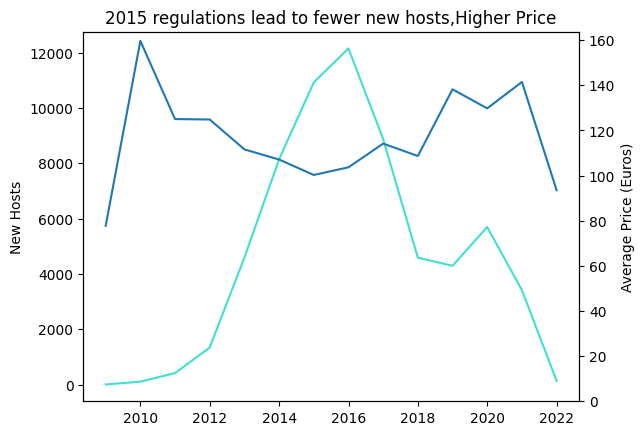

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label = "New Hosts",
    c="turquoise"
)
ax.set_ylabel("New Hosts")

ax2 = ax.twinx()
ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label = "Average Price",
)

ax2.set_ylim(0)

ax2.set_ylabel("Average Price (Euros)")

ax.set_title("2015 regulations lead to fewer new hosts,Higher Price")